In [1]:
import numpy as np
from scipy.stats import bootstrap
import matplotlib.pyplot as plt

In [2]:
# subsample_indices = np.random.choice(len(dm), size=subsample_size, replace=False)
def my_bootstrap(data, bsfunction, fraction, num_samples):
    length = len(data[0])
    samples_indexes = np.random.choice(length, size=(num_samples, round(fraction * length)))
    
    res = np.array([bsfunction([data[0][samples_indexes[i,:]], data[1][samples_indexes[i,:]]]) for i in range(num_samples)])
    
    return res*1/fraction, (1/fraction)**2 * np.cov(res.T)

In [3]:
# create the plot directly from binning masses
def generate_rho_distrib_parts_cum(data):
    masses, distances = data[0], data[1]
    # print(masses)
    masses_cum = np.array([(np.sum(masses[distances < distance_bins[i]])) for i in range(1,
                  len(distance_bins))])
    
    return masses_cum #/ (4/3 * np.pi * distance_bins[1:]**3).to(u.m**3)

In [70]:
def covariance_matrix_degeneracy_demo(num_points, num_bins, distance_bins, samples, name):
    masses = np.random.rand(num_points) * 10
    distances = np.random.exponential(scale=1, size=num_points) * 20
    
    
    plt.figure(dpi=300)
    plt.subplots
    
    fig, axes = plt.subplots(len(samples), 4, figsize=(20, 5*len(samples)), dpi=300)
    
    # Iterate over samples
    for sample in range(len(samples)):
        row = sample
        col = 0
    
        sampled_densities, cov_matrix = my_bootstrap([masses, distances], 
                                                 generate_rho_distrib_parts_cum, 0.7, samples[sample])
        
        
        # Plot for the first column
        ax = axes[sample, 0]
        ax.set_title(f"True Density - Mean Sampled Density, {samples[sample]} Samples")
        ax.set_xlabel("Distance")
        ax.set_ylabel("Density")
        
        # ax.bar(distance_bins[1:], , label="Sampled Histogram", alpha=0.8)
        density_diff = np.mean(sampled_densities, axis=0) - generate_rho_distrib_parts_cum([masses, distances])
    
        ax.scatter(distance_bins[1:], density_diff)
        ax.axhline(0, color="r", linestyle="--")
        for i in range(len(distance_bins) - 1):
            ax.plot([distance_bins[i+1], distance_bins[i+1]], [0, density_diff[i]], color='blue')
    
        
        col = 1
        
        # Plot for the second column
        ax = axes[sample, 1]
        ax.set_title(f"inv($\Sigma$)$\cdot\Sigma$")
        ax.set_xlabel("Distance")
        ax.set_ylabel("Distance")
    
        x, y = np.meshgrid(distance_bins, distance_bins)
        res = ax.pcolor(x, y, np.linalg.inv(cov_matrix) @ cov_matrix)
        # ax.set_yticks(distance_bins, labels=None)
        # ax.set_xticks(distance_bins, labels=[distance_bins[0], distance_bins[-1]], rotation=90)
        ax.invert_yaxis()
        plt.colorbar(res)
        
        # image = ax.imshow(np.linalg.inv(cov_matrix) @ cov_matrix)
        # plt.colorbar(image)
    
        col = 2
    
        ax = axes[sample, 2]
        ax.set_title(f"Correlation Coeffs, Sampled Densities")
        
        x, y = np.meshgrid(distance_bins, distance_bins)
        res = ax.pcolor(x, y, np.corrcoef(np.transpose(sampled_densities)))
    
        ax.invert_yaxis()
        plt.colorbar(res)
    
        col = 3
    
        ax = axes[sample, 3]
        ax.set_title(f"Correlation Coeffs, Covariance Matrix")
    
        x, y = np.meshgrid(distance_bins, distance_bins)
        res = ax.pcolor(x, y, np.corrcoef(cov_matrix))
    
        ax.invert_yaxis()
        plt.colorbar(res)
    
    
    plt.tight_layout()   
    
    # sampled_densities, cov_matrix = my_bootstrap([masses, distances], 
    #                                              generate_rho_distrib_parts_cum, 0.7, 10000)
    
    # plt.figure(dpi=300)
    # # plt.hist(distances * masses)
    # plt.bar(distance_bins[1:], np.mean(sampled_densities, axis=0), label="Sampled Histogram", alpha=0.8)
    # plt.bar(distance_bins[1:], generate_rho_distrib_parts_cum([masses, distances]), label="True Histogram", alpha=0.8)
    plt.savefig("../visuals/cov-degeneracy-demo-"+name+".png", bbox_inches='tight')
    plt.show()

<Figure size 1920x1440 with 0 Axes>

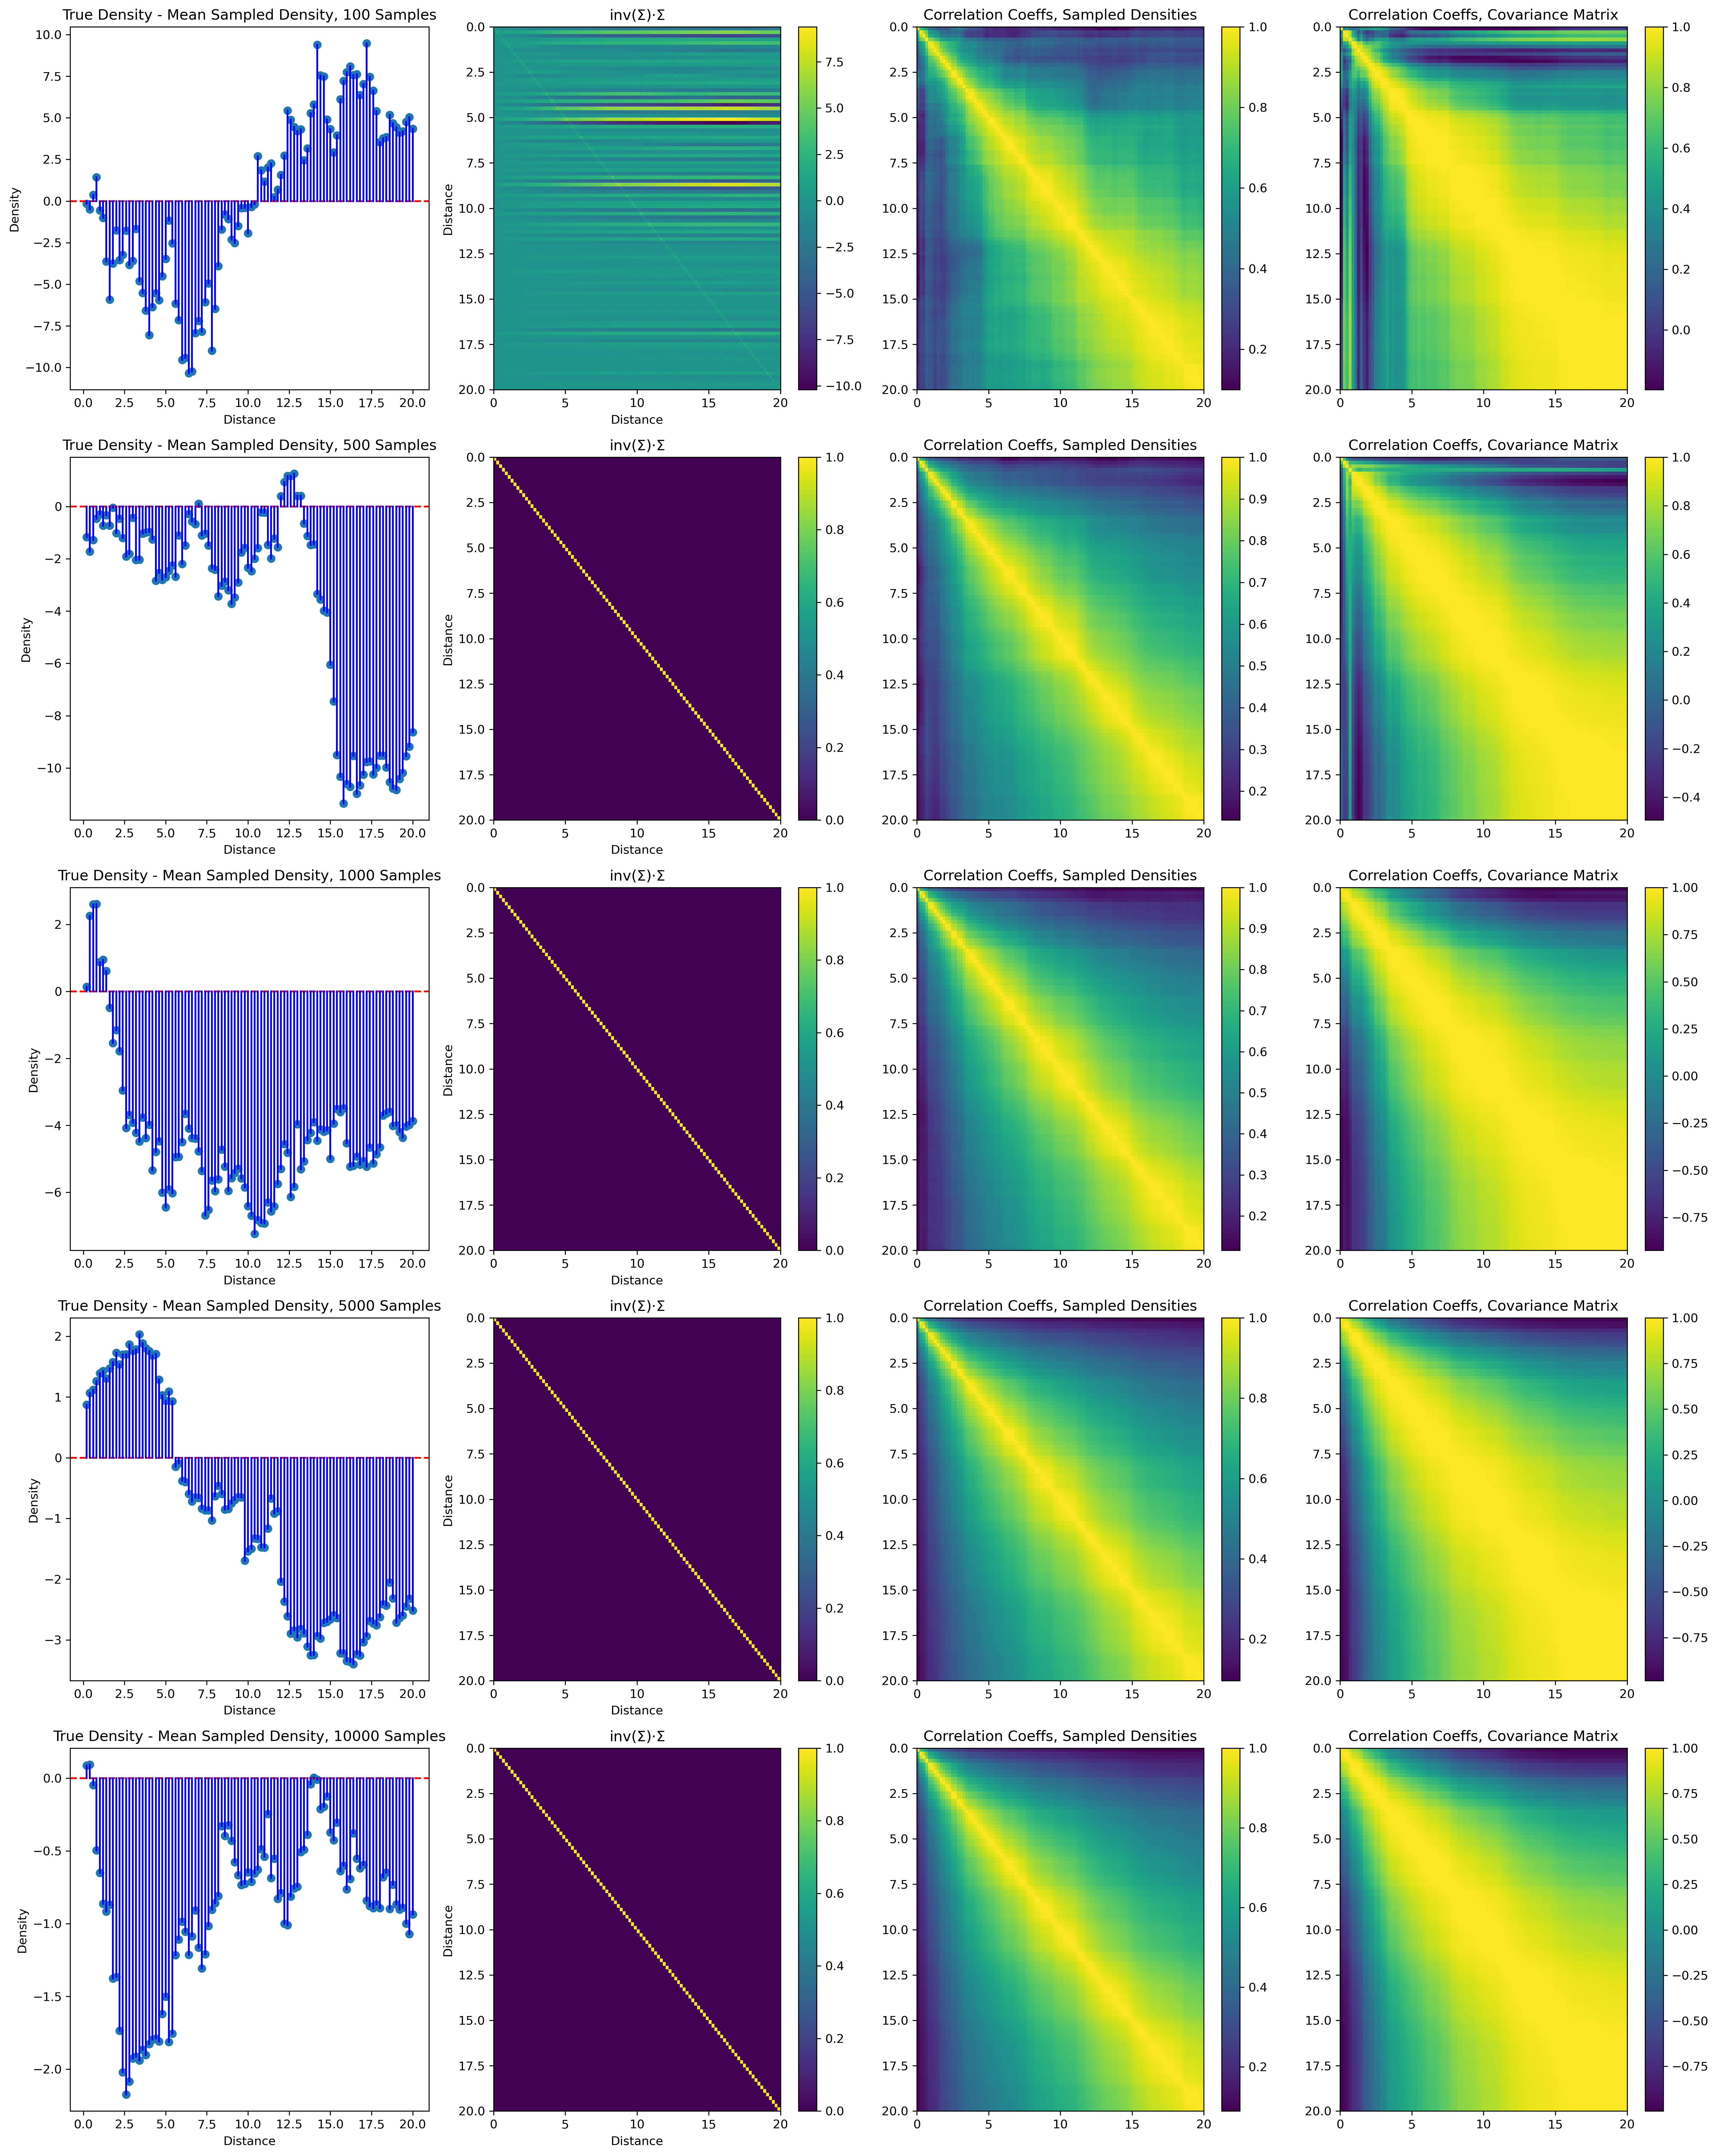

In [76]:
num_points = 1000
num_bins   = 100
# distance_bins = np.logspace(0, np.log10(20), num_bins+1, endpoint=True)
distance_bins = np.linspace(0, 20, num_bins+1, endpoint=True)
samples = [100, 500, 1000, 5000, 10000]
name = "100-bins-linear-binning"
covariance_matrix_degeneracy_demo(num_points = num_points, num_bins = num_bins, distance_bins = distance_bins, samples = samples,
                                 name=name)